In [139]:
# This is an example of loading a data file and making a light curve and spectrum.

import numpy as np
import pickle
import shelve
#import matplotlib
#matplotlib.use('PS')
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy import interpolate
from global_var import sysvars as gv
import integrate_total_power_interp as itpi

savefile = './afterglow_sych_spectrum.sphere.wind.p'

data_in = open(savefile, 'rb')
data = pickle.load(data_in)
data_in.close()

print('data loaded')

# The datafile with name savefile is now loaded.


data loaded


In [140]:
# This calls the function 'integrate_total_power_interp', which uses the datafile to 
# create arrays that store brightness seen at Earth at different wavelengths:
# jy - brightness at all times 'time' and all frequencies 'freq', in units of Janskys
# radio - brightness at all times 'time' interpolated to frequencies in radio_f in units of Janskys
# xray - total brightness at all times 'time' in xrays between xray_min (keV) and xray_max (keV) in units of erg/cm^2/s
# optical - total brightness at all times 'time' in R-band optical in units of magnitude.
# optical_AB - same as optical but in AB magnitude system.

h = 4.135667662e-15     #eV/s
to_ev = 4.1356691e-15 /2/np.pi  #convert omega(frequency) to eV
Mpc = 3.08e24  # Mpc in cm


time='0'


z_origional = 0.047 # Redshift everything was run at

# For GW170817:
# Cosmological Redshift from Hjorth et al., 2017, ApJL, 848, L31
z = 0.0098
#For Ho = 69.6, OmegaM = 0.286, Omegavac = 0.714, z = 0.356, using Ned Wright's cosmology calculator
#dl = 42.5 # Mpc
#For Ho = 73.24, OmegaM = 0.286, Omegavac = 0.714, z = 0.356, using Ned Wright's cosmology calculator.  
#This is the local Ho used by Hjorth et al. 2017, from Riess et al. 2016
dl = 40.4

#time_input='0'
#time_input = np.logspace(np.log10(0.1),np.log10(1000),161)*3600*24.


#radio_f=np.array([6.5e8,1.e9,3.e9,2.418e17])*h/(to_ev*2*np.pi)
radio_f=np.array([6.5e8,1.e9,3.e9,6.e9,1.e11,5.06e14,2.418e17,1.e22])*h/(to_ev*2*np.pi)



radio,xray,optical,optical_ab,time,freq, \
jy, time_origional, glow \
= itpi.integrate_total_power_interp(savefile, radio_f, z, z_origional, dl, \
                                    xray_min=0.3, xray_max=10.0, optical_f='0', time=time)
print(radio_f[3])

[6.49999774e+08 9.99999652e+08 2.99999896e+09 5.99999791e+09
 9.99999652e+10 5.05999824e+14 2.41799916e+17 9.99999652e+21]
[180. 180.]
DONE WITH INTERPOLATION!!!!
5999997913.75959


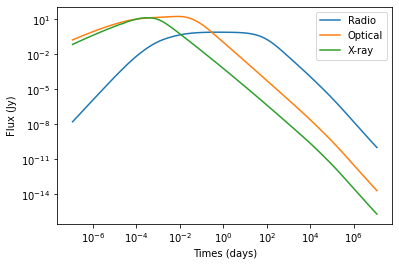

In [141]:
# Plot the light curve (brightness (JY) vs. time (s)) at 6 GHz, r-band, and 1 keV

plt.plot(time/3600/24,radio[:,3],label='Radio')
plt.plot(time/3600/24,radio[:,5],label='Optical')
plt.plot(time/3600/24,radio[:,6],label='X-ray')
plt.legend()

#plt.xlim([0.1,10000])
#plt.ylim([1.e-15,1.e-3])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Times (days)')
plt.ylabel('Flux (Jy)')

plt.show()


Spectrum at 100000.0 s = 1.1574074074074074 days


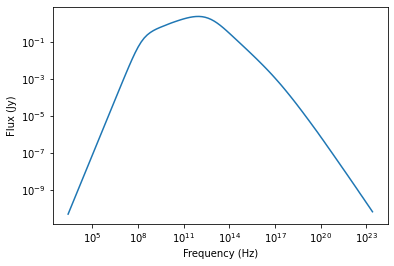

In [142]:
# Plots the spectrum (brightness (Jy) vs. freqeuncy (Hz)) for time[54] = 1e7s ~ 116 days

time_i = 42

print('Spectrum at',time[time_i],'s =',time[time_i]/3600/24,'days')

plt.plot(freq,jy[time_i,:])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Jy)')

plt.show()


time (days, sec) =  115.74074074074075 10000000.0
nu_sa, nu_m, nu_c =  484538360.8356346 1935555857.5718036 2091485173883242.5
external_A =  1.0030751686260442


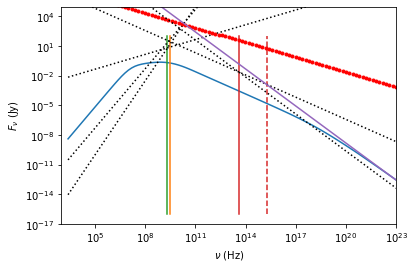

In [143]:
ti=54 #42

print('time (days, sec) = ',time[ti]/3600/24,time[ti])

p_index = 2.5
eb = 0.1
ee = 0.1*(p_index-2)/(p_index-1)
E52 = 1.
n0 = 1.e-2 #1.

nu_c =    (1 + z)**(-0.5) * 6.37*(p_index-0.46)*1.e13*np.exp(-1.16*p_index) * eb**(-1.5) * n0**-1 * E52**(-0.5) * (time[ti]/3600/24)**(-0.5)
nu_c_13 = (1 + z)**(-0.5) * 5.86*1.e12 * eb**(-1.5) * n0**-1 * E52**(-0.5) * (time[ti]/3600/24)**(-0.5)

nu_m =    (1 + z)**(0.5) * 3.73*(p_index - 0.67)*1.e15 * ee**2 * eb**0.5 * E52**0.5 * (time[ti]/3600/24)**(-1.5)
nu_m_12 = (1 + z)**(0.5) * 3.94*(p_index - 0.74)*1.e15 * ee**(-1/2) * eb**0.5 * E52**0.5 * (time[ti]/3600/24)**(-1.5)

nu_sa = (1 + z)**(-1) * 1.24 * (p_index-1)**(3/5) * (3*p_index + 2)**(-3/5) * 1.e9 * ee**-1 * eb**(1/5) * n0**(3/5) * E52**(1/5)

print('nu_sa, nu_m, nu_c = ',nu_sa,nu_m,nu_c)



# For ISM

F_A = (dl*Mpc/1.e28)**(-2) * (1 + z)**(9/4) * 1.18*(4.59 - p_index)*1.e5 * eb**(1/4) * n0**(-0.5) * E52**(1/4) * (time[ti]/3600/24)**(5/4) * (freq/1.e14)**(5/2)

F_B = (dl*Mpc/1.e28)**(-2) * (1 + z)**(5/2) * 4.2*(3*p_index+2)/(3*p_index-1)*1.e6 * ee * n0**(-0.5) * E52**(1/2) * (time[ti]/3600/24)**(1/2) * (freq/1.e14)**(2)

F_D = (dl*Mpc/1.e28)**(-2) * (1 + z)**(5/6) * 2.79*(p_index-1)/(3*p_index-1)*1.e-2 * ee**(-2/3) * eb**(1/3) * n0**(0.5) * E52**(5/6) * (time[ti]/3600/24)**(1/2) * (freq/1.e14)**(1/3)
#F_D = 3. * (dl*Mpc/1.e28)**(-2) * (1 + z)**(5/6) * 2.79*(p_index-1)/(3*p_index-1)*1.e-2 * ee**(-2/3) * eb**(1/3) * n0**(0.5) * E52**(5/6) * (time[ti]/3600/24)**(1/2) * (freq/1.e14)**(1/3)
F_D2 = 3/.4 * (dl*Mpc/1.e28)**(-2) * (1 + z)**(5/6) * 2.79*(p_index-1)/(3*p_index-1)*1.e-2 * ee**(-2/3) * eb**(1/3) * n0**(0.5) * E52**(5/6) * (time[ti]/3600/24)**(2/3) * (freq/1.e14)**(1/3)

F_E = (dl*Mpc/1.e28)**(-2) * (1 + z)**(7/6) * 7.3*1.e-2 * ee**(0) * eb**(1) * n0**(5/6) * E52**(7/6) * (time[ti]/3600/24)**(1/6) * (freq/1.e14)**(1/3)
#F_E = .1*4/3 * (dl*Mpc/1.e28)**(-2) * (1 + z)**(7/6) * 7.3*1.e-2 * ee**(0) * eb**(1) * n0**(5/6) * E52**(7/6) * (time[ti]/3600/24)**(1/3) * (freq/1.e14)**(1/3)

F_F = (dl*Mpc/1.e28)**(-2) * (1 + z)**(3/4) * 6.87*1.e-3 * ee**(0) * eb**(-1/4) * n0**(0) * E52**(3/4) * (time[ti]/3600/24)**(-1/4) * (freq/1.e14)**(-1/2)

F_G = (dl*Mpc/1.e28)**(-2) * (1 + z)**((3+p_index)/4) * 4.61*(p_index-0.04)*np.exp(2.53*p_index)*1.e-4 * ee**(p_index-1) * eb**((1+p_index)/4) * n0**(0.5) * E52**((3+p_index)/4) * (time[ti]/3600/24)**((3-3*p_index)/4) * (freq/1.e14)**((1-p_index)/2)
#F_G = .3 * (dl*Mpc/1.e28)**(-2) * (1 + z)**((3+p_index)/4) * 4.61*(p_index-0.04)*np.exp(2.53*p_index)*1.e-4 * ee**(p_index-1) * eb**((1+p_index)/4) * n0**(0.5) * E52**((3+p_index)/4) * (time[ti]/3600/24)**(3*(1-p_index)/4) * (freq/1.e14)**((1-p_index)/2)

F_H = (dl*Mpc/1.e28)**(-2) * (1 + z)**((2+p_index)/4) * 8.55*(p_index-0.98)*np.exp(1.95*p_index)*1.e-4 * ee**(p_index-1) * eb**((p_index-2)/4) * n0**(0) * E52**((2+p_index)/4) * (time[ti]/3600/24)**((2-3*p_index)/4) * (freq/1.e14)**((-p_index)/2)
#F_H = .3 * (dl*Mpc/1.e28)**(-2) * (1 + z)**((2+p_index)/4) * 8.55*(p_index-0.98)*np.exp(1.95*p_index)*1.e-4 * ee**(p_index-1) * eb**((p_index-2)/4) * n0**(0) * E52**((2+p_index)/4) * (time[ti]/3600/24)**((2-3*p_index)/4) * (freq/1.e14)**((-p_index)/2)


# Trying to get the shape at the cooling break

F_nu_c = (dl*Mpc/1.e28)**(-2) * (1 + z)**((p_index+1)/2)  * 4.68*np.exp(4.82*(p_index-2.5)) * ee**(p_index-1) * eb**(p_index-1/2) * n0**(p_index/2) * E52**((p_index+1)/2) * (time[ti]/3600/24)**((1-p_index)/2)
s_nu_c = 1.15-0.06*p_index

F_GH = F_nu_c * ((freq/nu_c)**(s_nu_c*(p_index-1)/2) + (freq/nu_c)**(s_nu_c*(p_index)/2))**(-1/s_nu_c)


mul=6.5

nu_c2 = nu_c * mul**2
F_nu_c2 = F_nu_c * (mul**2)**(-(p_index-1)/2)

F_GH2 = F_nu_c2 * ((freq/nu_c2)**(s_nu_c*(p_index-1)/2) + (freq/nu_c2)**(s_nu_c*(p_index)/2))**(-1/s_nu_c)




# For wind

v_wind = 1000.      # km/s
m_dot_wind = 1e-5 #1.e-5  #*24.  ;3.d-5  ; m_sun/year
external_A = (m_dot_wind*1.98892*1.e33/(365.25*24.*3600.))/(v_wind*1.e5)/4./np.pi/5.e11   # for wind ;We're in a wind  

print('external_A = ',external_A)

F_A = 2.96*(4.59-p_index)*1.e4 * (1+z)**(7/4) * eb**(-1/4) * external_A**(-1) * E52**(3/4) * (time[ti]/3600/24)**(7/4) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**(5/2)
F_B = 1.33*(3*p_index+2)/(3*p_index-1)*1.e6 * (1+z)**(2) * ee * external_A**(-1) * E52 * (time[ti]/3600/24) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**(2)
F_C = 3.28e2 * (1+z)**(11/8) * eb**(-1/4) * external_A**(-5/8) * E52**(3/4) * (time[ti]/3600/24) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**(11/8)
F_D = 211*1.e-3 * (p_index-1)/(3*p_index-1) * (1+z)**(4/3) * ee**(-2/3) * eb**(1/3) * external_A * E52**(1/3) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**(1/2)
##        power_e[i,:]  = 0
F_F  = 6.68*1.e-3 * (1+z)**(3/4) * eb**(-1/4) * E52**(3/4) * (time[ti]/3600/24)**(-1/4) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**(-1/2)
F_G  = 3.82*1.e-3 * (p_index-0.18)*np.exp(2.54*p_index) * (1+z)**((5+p_index)/4) * ee**(p_index-1) * eb**((p_index+1)/4) *external_A * E52**((1+p_index)/4) * (time[ti]/3600/24)**((1-3*p_index)/4) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**((1-p_index)/2)
F_H  = 0.0381*1.e-3 * (7.11-p_index)*np.exp(2.76*p_index) * (1+z)**((2+p_index)/4) * ee**(p_index-1) * eb**((p_index-2)/4) * E52**((2+p_index)/4) * (time[ti]/3600/24)**((2-3*p_index)/4) * (dl*Mpc/1.e28)**(-2) * (freq/1.e14)**(-p_index/2)

nu_c =    (1 + z)**(-3/2) * 4.40*(3.45-p_index)*1.e10*np.exp(0.45*p_index) * eb**(-1.5) * external_A**(-2) * E52**(0.5) * (time[ti]/3600/24)**(0.5)
#nu_c_13 = (1 + z)**(-0.5) * 5.86*1.e12 * eb**(-1.5) * n0**-1 * E52**(-0.5) * (time[ti]/3600/24)**(-0.5)
# This transition no in Granot & Sari 2002.  More complicated.

nu_m =    (1 + z)**(0.5) * 4.02*(p_index - 0.69)*1.e15 * ee**2 * eb**0.5 * E52**0.5 * (time[ti]/3600/24)**(-1.5)
nu_m_12 = (1 + z)**(0.5) * 3.52*(p_index - 0.31)*1.e15 * ee**(2) * eb**0.5 * E52**0.5 * (time[ti]/3600/24)**(-1.5)

nu_sa = (1 + z)**(-2/5) * 8.31 * (p_index-1)**(3/5) * (3*p_index + 2)**(-3/5) * 1.e9 * ee**-1 * eb**(1/5) * external_A**(6/5) * E52**(-2/5) * (time[ti]/3600/24)**(-3/5)



plt.plot(freq,jy[ti,:],'C0')
#plt.plot(freq,jy[ti+6,:]*1e14,'C1')
plt.plot([nu_sa,nu_sa],[1.e-16,1.e2],'C1')
plt.plot([nu_m,nu_m],[1.e-16,1.e2],'C2')
#plt.plot([nu_m_12,nu_m_12],[1.e-16,1.e2],'g--')
plt.plot([nu_c,nu_c],[1.e-16,1.e2],'C3')
#plt.plot([nu_c_13,nu_c_13],[1.e-16,1.e2],'k--')
plt.plot(np.array([nu_c,nu_c])*6.5**2,[1.e-16,1.e2],'C3--')
#plt.plot(np.array([nu_c,nu_c])*6.5**4,[1.e-16,1.e2],'C3--')
plt.plot(freq,F_A,'k:')
plt.plot(freq,F_B,'k:')
plt.plot(freq,F_D,'k:')

#plt.plot(freq,F_D2,'b--')
#plt.plot(freq,F_E,'b.')
plt.plot(freq,F_F,'r.')
#plt.plot(freq,F_C,'b.')

plt.plot(freq,F_G,'k:')
plt.plot(freq,F_H,'k:')
plt.plot(freq,F_H*6.5,'C4')

#plt.plot(freq,F_GH2,'b-')
plt.xscale('log')
plt.yscale('log')
#plt.ylim([1.e-16,1.e5])
#plt.ylim([1.e-10,1.e5])
plt.ylim([1.e-17,1.e5])
plt.xlim([1.e3,1.e23])
#plt.xlim([1.e14,1.e22])
plt.xlabel('$\\nu$ (Hz)')
plt.ylabel('$F_{\\nu}$ (Jy)')
#plt.savefig('normalization_test.pdf')
plt.show()



No variables match your requested type.
data is a  <class 'dict'>

dict_keys(['total_power_arr', 'glow_arr', 'angle_int_arr', 'angle_omegasobs', 't_arr', 'total_power_f_arr', 'total_power_b_arr', 'freq_arr', 'input_params', 'input_params_names'])


(12, 1, 30, 85, 2)
r12 =  263024.0583274774
R12 =  263041.2394261341
n =  3112.492041630909
gamma =  1.0443210820242894
Eiso =  1.0000000000000007e+52
ejecta_mass =  5.55555555555556e+28
swept mass =  1.6577110112577842e+30
bad swept mass =  3.822773056665918e+64
rough gamma =  7.485337031806838
bad rough gamma =  1.0
diff radius =  6.127609314665594e+16
diff velocity =  0.4571481399893946
beta =  0.2882343164353888


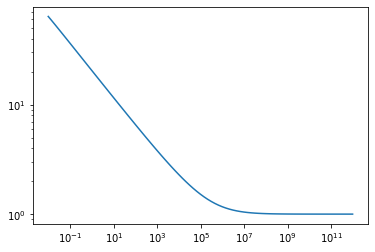

In [138]:
# This just shows you some information about what variables were loaded.

%who   # list all the current varaibles

print('data is a ',type(data))
print('')
print(data.keys())
print('')
#print(data['t_arr'])
t_arr=data['t_arr']
print('')

glow_arr = data['glow_arr']

print(glow_arr.shape)


print('r12 = ',glow_arr[2,0,0,ti,0]/1.e12)  # radius
print('R12 = ',glow_arr[8,0,0,ti,0]/1.e12)  # radius
print('n = ',glow_arr[5,0,0,ti,0])  # density
print('gamma = ',glow_arr[7,0,0,ti,0])  # gamma
print('Eiso = ',glow_arr[11,0,0,ti,0]) # Eiso

print('ejecta_mass = ',glow_arr[11,0,0,ti,0]/200./9.e20)
print('swept mass = ',external_A*5.e11*4*np.pi*glow_arr[2,0,0,ti,0])
print('bad swept mass = ',external_A*5.e11*4*np.pi/3.*glow_arr[2,0,0,ti,0]**3.)

print('rough gamma = ',1+glow_arr[11,0,0,ti,0]/9.e20/(external_A*5.e11*4*np.pi*glow_arr[2,0,0,ti,0]+glow_arr[11,0,0,ti,0]/200./9.e20))
print('bad rough gamma = ',1+glow_arr[11,0,0,ti,0]/9.e20/(external_A*5.e11*4*np.pi/3*glow_arr[2,0,0,ti,0]**3.+glow_arr[11,0,0,ti,0]/200./9.e20))


print('diff radius = ',glow_arr[2,0,0,ti+1,0]-glow_arr[2,0,0,ti,0])
print('diff velocity = ',(glow_arr[2,0,0,ti+1,0]-glow_arr[2,0,0,ti,0])/(t_arr[ti+1]-t_arr[ti])/3.e10)
print('beta = ',glow_arr[10,0,0,ti,0])

#plt.plot(glow_arr[0,0,:,42,0],glow_arr[1,0,:,42,0])
#plt.plot(glow_arr[2,0,0,:,0],glow_arr[5,0,0,:,0])
plt.plot(t_arr[:],glow_arr[7,0,0,:,0])
plt.xscale('log')
plt.yscale('log')
plt.show()
